In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets, metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn import preprocessing
#from sklearn.mixture import GMM
#from learning_model import *
#from sklearn.cross_validation import train_test_split
#from data_handle import * 

Using TensorFlow backend.


                x           y          pci        rsrp         dis
count  180.000000  180.000000   180.000000  180.000000  180.000000
mean    75.592283   13.285358  4013.888889  -84.042380    8.940804
std     13.995406    6.207181   124.066971   10.516647    5.152265
min     49.178500    0.935500  3800.000000 -119.400000    0.347082
25%     64.651000    8.348500  3900.000000  -89.866879    4.988289
50%     76.267750   13.886500  4100.000000  -83.564569    8.307024
75%     87.012625   18.108250  4100.000000  -76.998335   12.351026
max    102.161500   24.023500  4200.000000  -59.969203   26.288881


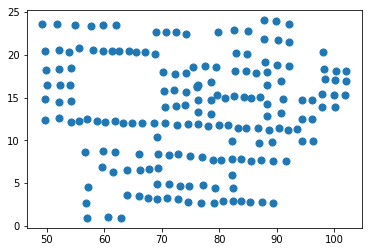

In [2]:
rem_pci_all = pd.read_csv("./interface/rsrp_set33_noleft.csv")
#rem_pci_all = pd.read_csv("rem_pci_train_pd.csv")
#rem_pci = pd.read_csv("rem_rsrp_train_pd.csv")
#rem_test = pd.read_csv("rem_test_pd.csv")
#rem_pci_np = np.genfromtxt('rem_pci_train.csv', delimiter=',')
#rem_rsrp = pd.read_csv("rem_rsrp_train.csv")
#print(rem_pci_all)
plt.scatter(rem_pci_all['x'], rem_pci_all['y'], s=50);
#print(type(rem_pci_all))
print(rem_pci_all.describe())



In [3]:
#rem_pci_all = preprocessing.scale(rem_pci_all)
#print (rem_pci_all)
#np.savetxt('normalize.csv', rem_pci_all, delimiter=',', fmt='%f')

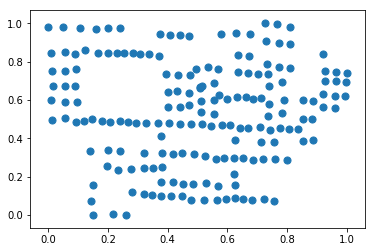

In [4]:
#print (rem_pci_all)
#print (type(rem_pci_all))
#print(rem_pci_all)
'''
rem_pci_all.insert(4,"pci_37",0)
rem_pci_all.insert(5,"pci_38",0) 
rem_pci_all.insert(6,"pci_39",0) 
rem_pci_all.insert(7,"pci_40",0)
rem_pci_all.insert(8,"pci_41",0) 
rem_pci_all.insert(9,"pci_42",0) 
'''
rem_pci_all.insert(5,"pci_37",0)
rem_pci_all.insert(6,"pci_38",0) 
rem_pci_all.insert(7,"pci_39",0) 
rem_pci_all.insert(8,"pci_40",0)
rem_pci_all.insert(9,"pci_41",0) 
rem_pci_all.insert(10,"pci_42",0) 

'''
for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 3700:
        rem_pci_all.iloc[i,4] = "1"
    if rem_pci_all.iloc[i,2] == 3800:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 3900:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 4000:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 4100:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 4200:
        rem_pci_all.iloc[i,9] = "1"
'''
for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 3700:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 3800:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 3900:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 4000:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 4100:
        rem_pci_all.iloc[i,9] = "1"
    if rem_pci_all.iloc[i,2] == 4200:
        rem_pci_all.iloc[i,10] = "1"

#print(rem_pci_all)
#print("==========")
#rem_pci_all = rem_pci_all[['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
rem_pci_all = rem_pci_all[['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
rem_pci_all_copy = rem_pci_all
rem_pci_all_cut = rem_pci_all.drop(['pci'], axis=1)
#print(rem_pci_all)
#print(rem_pci_all)
#print("===")  
rem_pci_all=rem_pci_all_cut.values
#print (type(rem_pci_all))
#print (rem_pci_all)
#:::Normalize[0,1]
#print(rem_pci_all_cut)
min_max_scaler = preprocessing.MinMaxScaler()
rem_pci_all_n = min_max_scaler.fit_transform(rem_pci_all_cut)
#:::Normalize[-1,1]
  #max_abs_scaler = preprocessing.MaxAbsScaler()
  #rem_pci_all_n = max_abs_scaler.fit_transform(rem_pci_all_cut)

#:::Standardisation
#print(rem_pci_all_cut)
  #rem_pci_all_n = preprocessing.scale(rem_pci_all_cut)
#print(rem_pci_all_n.mean(axis=0))
#print(rem_pci_all_n.std(axis=0))
#print(rem_pci_all_n)
#print("===")  
rem_pci_all_n_pd = pd.DataFrame(rem_pci_all_n,columns = ['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'])
#print(rem_pci_all_n_pd)
rem_pci_all_n_pd.to_csv("./debug/rem_pci_all_n_pd.csv")

for i in range(0,len(rem_pci_all_n_pd)):
    if rem_pci_all_n_pd.iloc[i,3] == 1:
        rem_pci_all_n_pd.iloc[i,3] = "0.2"
    if rem_pci_all_n_pd.iloc[i,4] == 1:
        rem_pci_all_n_pd.iloc[i,4] = "0.2"
    if rem_pci_all_n_pd.iloc[i,5] == 1:
        rem_pci_all_n_pd.iloc[i,5] = "0.2"
    if rem_pci_all_n_pd.iloc[i,6] == 1:
        rem_pci_all_n_pd.iloc[i,6] = "0.2"
    if rem_pci_all_n_pd.iloc[i,7] == 1:
        rem_pci_all_n_pd.iloc[i,7] = "0.2"
    if rem_pci_all_n_pd.iloc[i,8] == 1:
        rem_pci_all_n_pd.iloc[i,8] = "0.2"

#print (rem_pci_all_n_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50);


In [5]:
def group(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y','pci']).apply(pd.DataFrame.mode)
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

In [6]:
def group_pcimap(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y']).median()
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

0.36149726051921394


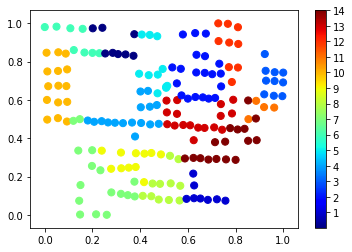

In [7]:
#print(rem_pci_all_n_pd)
group_median,group_drift = group_pcimap(rem_pci_all_n_pd)
#rsrp,group_drift = group(rem_rsrp)
#print("rem_rsrp==",rsrp)
#rem_rsrp.to_csv("rsrp.csv")
#group_median,group_drift = group(rem_test)
kmeans = KMeans(n_clusters=15)
#np.savetxt('group_median.csv', group_median, delimiter=',', fmt='%f')
#group_median = pd.read_csv("group_median.csv")
#print(rem_pci['pci'])
kmeans_fit = kmeans.fit(rem_pci_all_n_pd)
y_kmeans = kmeans.predict(rem_pci_all_n_pd)
#kmeans_fit = kmeans.fit(group_median)
#print(group_median)
#y_kmeans = kmeans.predict(group_median)
#print(y_kmeans)
#print(y_kmeans.shape)


#print(y_kmeans_pd)

#add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans.to_csv('add_kmeans.csv')
#print(group_median)
rem_pci_all_pd = pd.DataFrame(rem_pci_all_copy,columns=['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci'])
#print(type(rem_pci_all_pd))
#print(type(add_kmeans))

#print(rem_pci_all_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50, c=y_kmeans, cmap='jet');
y_kmeans_pd = pd.DataFrame({'zone':y_kmeans})
add_kmeans = pd.merge(rem_pci_all_pd,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans = pd.merge(rem_pci_all_pd['pci'],add_kmeans, left_index=True, right_index=True)
for i in range(14,-1,-1):
    add_kmeans['zone'].replace(i,i+1,inplace=True)
'''
add_kmeans['zone'].replace(5,6,inplace=True)
add_kmeans['zone'].replace(4,5,inplace=True)
add_kmeans['zone'].replace(3,4,inplace=True)
add_kmeans['zone'].replace(2,3,inplace=True)
add_kmeans['zone'].replace(1,2,inplace=True)
add_kmeans['zone'].replace(0,1,inplace=True)
'''
add_kmeans['pci'] = add_kmeans['pci'].map(lambda x:int(x/100))

add_kmeans.to_csv('aaa.csv')
add_kmeans.values[:,:]
add_kmeans = add_kmeans.drop(['pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'], axis=1)
add_kmeans = add_kmeans[['x','y','pci','rsrp','zone']]
add_kmeans = add_kmeans.values
#print(add_kmeans)
np.savetxt('./zone_result/set33_part_train.csv', add_kmeans, delimiter=',', fmt='%s')
#y_kmeans = np.reshape(y_kmeans, (27, 105))
#np.savetxt('y_kmeans.csv', y_kmeans, delimiter=',', fmt='%f')
cluster_labels = kmeans_fit.labels_
silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
print(silhouette_avg)
plt.colorbar(ticks=range(1,15))

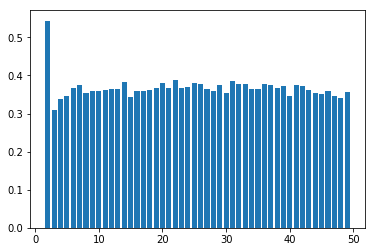

[0.5437275497570657, 0.3091192021252931, 0.33825891093292965, 0.3473560732988025, 0.36609846808518887, 0.3762419288682098, 0.35507857643057333, 0.3600115426941478, 0.3604472656165854, 0.361303205564955, 0.3638159909905613, 0.3648312835261244, 0.38356896944898183, 0.344667506591013, 0.3582981153528866, 0.35870034526150174, 0.3618680825998811, 0.3665153429332348, 0.3812787413091639, 0.36822737950436496, 0.3875458070383233, 0.3658791823416062, 0.369829795078554, 0.3805381648601372, 0.37837385462180556, 0.3655991644352961, 0.36027150554463633, 0.37393942318040224, 0.35361159347525284, 0.3842906086734909, 0.37669144040519764, 0.3776388535223521, 0.36343774544400403, 0.3651624098874175, 0.3764262198155257, 0.375398386331629, 0.3667648303926626, 0.37135654086493636, 0.34629201349733313, 0.3744159039233681, 0.3716763580671537, 0.3629715098155272, 0.35429713824504844, 0.35019827081573995, 0.35999645304837496, 0.3465423223345979, 0.34124681407832846, 0.35529912497238825]


In [179]:
# 迴圈
silhouette_avgs = []
ks = range(2, 50)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_pci_all_n_pd)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)